In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from timeit import default_timer as timer
from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("VARIMA_OHLC_USDPHP.csv")
data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2922 non-null   object 
 1   Open    2922 non-null   float64
 2   High    2922 non-null   float64
 3   Low     2922 non-null   float64
 4   Close   2922 non-null   float64
dtypes: float64(4), object(1)
memory usage: 114.3+ KB


,Date,Open,High,Low,Close
0,03/01/2017 9:00,49.700,49.825,49.70,49.780
1,03/01/2017 13:00,49.775,49.800,49.77,49.780
2,04/01/2017 9:00,49.800,49.850,49.73,49.730
3,04/01/2017 13:00,49.715,49.765,49.67,49.685
4,05/01/2017 9:00,49.595,49.700,49.54,49.615


### Data Pre-Processing

In [3]:
df = data.replace(',', '', regex=True)
df[['Open', 'High', 'Low', 'Close']] = df[['Open', 'High', 'Low', 'Close']].astype(float)



### Splitting the Original Data

In [4]:
train_percentage = 0.8
test_percentage = 1 - train_percentage 
train_size_orig_data= int(len(df) * train_percentage)
df_train_orig = df.iloc[:train_size_orig_data] #train set
df_test_orig = df.iloc[train_size_orig_data:] #test set
df_train_orig_graph = df_train_orig[['Open', 'High', 'Low', 'Close']]
df_test_orig_graph = df_test_orig[['Open', 'High', 'Low', 'Close']]

In [5]:
df_train_orig 

,Date,Open,High,Low,Close
0,03/01/2017 9:00,49.700,49.825,49.700,49.780
1,03/01/2017 13:00,49.775,49.800,49.770,49.780
2,04/01/2017 9:00,49.800,49.850,49.730,49.730
3,04/01/2017 13:00,49.715,49.765,49.670,49.685
4,05/01/2017 9:00,49.595,49.700,49.540,49.615
...,...,...,...,...,...
2332,19/10/2021 9:00,50.833,50.882,50.725,50.736
2333,19/10/2021 13:00,50.737,50.737,50.685,50.730
2334,20/10/2021 9:00,50.698,50.840,50.698,50.810
2335,20/10/2021 13:00,50.785,50.823,50.773,50.807


### Plot of the Original Data

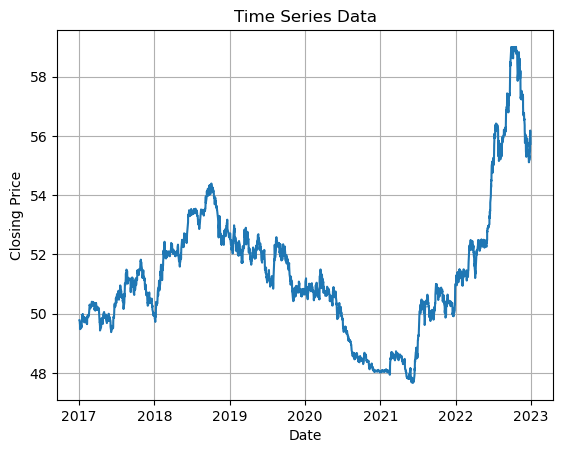

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M')

# Step 3: Create the plot

plt.plot(df['Date'], df['Close'])

# Step 4: Customize the plot (optional)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Time Series Data')
plt.grid(True)

# Step 5: Display the plot
plt.show()

### Checking the Stationarity of the Data

### OHLC

In [7]:
#Open
result = adfuller(df['Open'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:Open")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

#High
result = adfuller(df['High'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:High")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

#Low
result = adfuller(df['Low'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:Low")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

#Close
result = adfuller(df['Close'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:Close")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

Dickey-Fuller test for feature:Open
Test Statistic: -0.897066
p-value: 0.788937
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject H0 - Time Series is Non-Stationary
Dickey-Fuller test for feature:High
Test Statistic: -0.843672
p-value: 0.805956
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject H0 - Time Series is Non-Stationary
Dickey-Fuller test for feature:Low
Test Statistic: -0.758761
p-value: 0.830937
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject H0 - Time Series is Non-Stationary
Dickey-Fuller test for feature:Close
Test Statistic: -0.835968
p-value: 0.808328
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject H0 - Time Series is Non-Stationary


### Mitigating the Problem of Non-Stationarity through Differencing

In [8]:
df['Close_diff'] = df['Close'].diff()
df['Open_diff'] = df['Open'].diff()
df['Low_diff'] = df['Low'].diff()
df['High_diff'] = df['High'].diff()
df = df.dropna()
df.shape
data_uti=df[['Date','Open_diff','Close_diff','Low_diff','High_diff']]
## Renaming the Columns of the Table
data_uti.rename(
    columns={"Open_diff": "Open", "Close_diff": "Close","High_diff":"High","Low_diff": "Low"},
    inplace=True,
)
data_uti=data_uti.reset_index(drop=True)
data_uti[:2]

,Date,Open,Close,Low,High
0,2017-01-03 13:00:00,0.075,0.00,0.07,-0.025
1,2017-01-04 09:00:00,0.025,-0.05,-0.04,0.050


### Plot of the Differenced Data

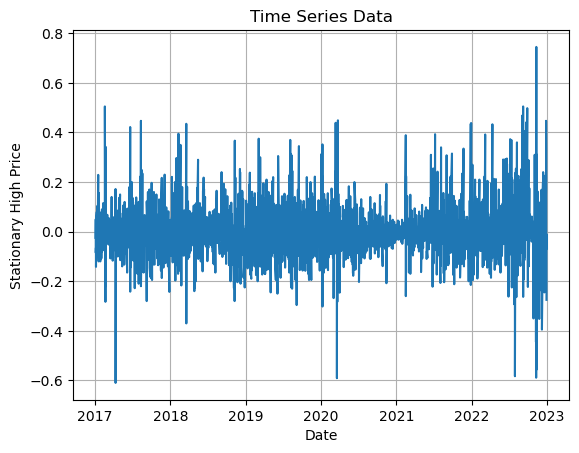

In [9]:
plt.plot(data_uti['Date'], data_uti['High'])

# Step 4: Customize the plot (optional)
plt.xlabel('Date')
plt.ylabel('Stationary High Price')
plt.title('Time Series Data')
plt.grid(True)

# Step 5: Display the plot
plt.show()

### Checking the Stationarity again through AD-Fuller test

In [10]:
#Open
result = adfuller(data_uti['Open'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:Open after Differencing")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")


#High
result = adfuller(data_uti['High'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:High after Differencing")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

#Low
result = adfuller(data_uti['Low'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:Low after Differencing")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")

#Close
result = adfuller(data_uti['Close'].values)
#Extracting the values from the results:
print("Dickey-Fuller test for feature:Close after Differencing")

print('Test Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H0 - Time Series is Stationary")
else:
    print ("Failed to Reject H0 - Time Series is Non-Stationary")


Dickey-Fuller test for feature:Open after Differencing
Test Statistic: -11.928929
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject H0 - Time Series is Stationary
Dickey-Fuller test for feature:High after Differencing
Test Statistic: -12.341430
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject H0 - Time Series is Stationary
Dickey-Fuller test for feature:Low after Differencing
Test Statistic: -15.652120
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject H0 - Time Series is Stationary
Dickey-Fuller test for feature:Close after Differencing
Test Statistic: -15.079850
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Reject H0 - Time Series is Stationary


### Splitting the Differenced Data

In [11]:
train_size = int(len(data_uti) * train_percentage)
test_size = int(len(data_uti) * test_percentage)

df_train_diff = data_uti.iloc[:train_size]

df_test_diff = data_uti.iloc[train_size:]

train_data_diff = df_train_diff.reset_index(drop=True)
test_data_diff = df_test_diff.reset_index(drop=True)

### autoarima

### Open

In [12]:
target_variable_open = 'Open'

# Extract the time series data for the target variable
ts_open = train_data_diff[target_variable_open]


# Apply auto_arima to find the best ARIMA model
stepwise_model_open = auto_arima(ts_open, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(stepwise_model_open.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-4471.300, Time=1.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-4449.398, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4453.969, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-4454.274, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4451.331, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-4450.321, Time=0.52 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-4455.146, Time=1.14 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-4471.448, Time=1.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-4471.566, Time=1.24 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-4468.226, Time=1.01 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-4473.579, Time=1.66 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-4474.911, Time=0.53 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-4473.825, Time=0.62 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-4471.832, Time=0.92 sec
 ARIMA(4,0,0)(0,0,0

### High

In [13]:
target_variable_high = 'High'

# Extract the time series data for the target variable
ts_high = train_data_diff[target_variable_high]
tst_high= test_data_diff[target_variable_high]

# Apply auto_arima to find the best ARIMA model
stepwise_model_high = auto_arima(ts_high, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(stepwise_model_high.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-4461.133, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4460.654, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-4460.657, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4463.079, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-4458.657, Time=0.65 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 3.345 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2336
Model:                        SARIMAX   Log Likelihood                2232.540
Date:                Mon, 08 Apr 2024   AIC                          -4463.079
Time:                        07:08:30   BIC                          -4457.323
Sample:                             0   HQIC                         -4460.982
          

In [14]:
### The autoarima of High by limitting the order. 

target_variable_high = 'High'
ts_high = train_data_diff[target_variable_high]

best_model_high= auto_arima(ts_high, start_p=0, d=0, start_q=0,
           max_p=5, max_d=0, max_q=5, seasonal=False,
           trace=True, suppress_warnings=True, stepwise=False)
best_model_high_fit = best_model_high.fit(ts_high)
print(best_model_high.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4463.079, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-4462.606, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-4460.609, Time=0.16 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-4468.310, Time=0.23 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-4474.607, Time=0.36 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=-4475.321, Time=0.42 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-4462.603, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-4460.607, Time=0.36 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=1.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=1.27 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=1.45 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-4460.625, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-4458.614, Time=0.23 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.57 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-4515.529, Time=0.62 sec
 ARIMA(3,0,0)(0,0,0

### Low

In [15]:
target_variable_low = 'Low'

# Extract the time series data for the target variable
ts_low = train_data_diff[target_variable_low]

# Apply auto_arima to find the best ARIMA model
stepwise_model_low = auto_arima(ts_low, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(stepwise_model_low.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-4461.131, Time=1.95 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-4449.356, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4450.969, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-4451.048, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4451.300, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-4450.252, Time=1.39 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.35 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.35 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-4449.066, Time=1.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-4494.854, Time=2.62 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-4490.206, Time=2.92 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=-4485.5

### Close

In [16]:
target_variable_close = 'Close'

# Extract the time series data for the target variable
ts_close = train_data_diff[target_variable_close]

# Apply auto_arima to find the best ARIMA model
stepwise_model_close = auto_arima(ts_close, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(stepwise_model_close.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-4567.532, Time=2.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-4553.750, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4557.720, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-4558.316, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4555.690, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-4559.024, Time=0.45 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-4559.412, Time=1.00 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-4561.806, Time=2.25 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-4567.881, Time=2.28 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-4557.227, Time=0.61 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-4568.382, Time=2.04 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-4565.912, Time=2.91 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=-4565.755, Time=3.87 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-4563.195, Time=2.97 sec
 ARIMA(4,0,2)(0,0,0

## List of order (p,q) from auto arima

In [17]:
print(stepwise_model_open.summary())
print(best_model_high.summary())
print(stepwise_model_low.summary())
print(stepwise_model_close.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2336
Model:               SARIMAX(4, 0, 0)   Log Likelihood                2243.423
Date:                Mon, 08 Apr 2024   AIC                          -4476.845
Time:                        07:09:57   BIC                          -4448.064
Sample:                             0   HQIC                         -4466.360
                               - 2336                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0568      0.013      4.330      0.000       0.031       0.083
ar.L2         -0.0221      0.016     -1.375      0.169      -0.054       0.009
ar.L3         -0.0864      0.017     -4.969      0.0

### Testing ARIMA

In [18]:
train_data_diff_nd =train_data_diff.drop('Date',axis=1)
test_data_diff_nd= test_data_diff.drop('Date',axis=1)

## Reference for Cumsum

In [19]:
original_train=df_train_orig.iloc[:,1:5]
original_train=original_train.reset_index(drop=True)
# original_test = original_test.astype(float)
new_column_names = ['Pred_Open','Pred_High','Pred_Low','Pred_Close']
original_train.columns=new_column_names


last_row = original_train.iloc[-1]
last_row_train = pd.DataFrame(last_row).T  # Transpose the row to create a DataFrame with one row

last_row_train

,Pred_Open,Pred_High,Pred_Low,Pred_Close
2336,50.863,50.863,50.77,50.863


### For Open Prices


In [20]:
def ARIMA_model(train, test):
    # Extract 'Open' values from train and test sets
    train_open = train['Open']
    # Fit ARIMA model
    model = ARIMA(train_open, order=(4, 0, 0))  # Adjust p, d, q as needed
    model_fit = model.fit()  # Removed disp=False argument
    # Make prediction
    yhat = model_fit.forecast(steps=len(test))
    # Create DataFrame with predictions
    pred_open = pd.DataFrame({"Pred_Open": yhat})
    return pred_open

# Assuming train_data_diff_nd and validation_data_diff_nd are DataFrames with 'Open' column
df_arima_final_pred_open = ARIMA_model(train_data_diff_nd , test_data_diff_nd)


In [21]:
final_open_arima= df_arima_final_pred_open.reset_index(drop=True)
final_open_arima=pd.DataFrame(final_open_arima)
final_open_arima

,Pred_Open
0,0.000507
1,-0.011103
2,-0.001590
3,0.005352
4,0.001814
...,...
580,0.000489
581,0.000489
582,0.000489
583,0.000489


In [22]:
# Extract the last value of the 'Pred_Open' column from last_row_df
last_train_open_value = last_row_train["Pred_Open"].iloc[-1]
# Create a DataFrame with the last value
last_train_open_df = pd.DataFrame([last_train_open_value], columns=["Pred_Open"])
# Concatenate last_train_open_df with final_open_arima
final_open_arima_true = pd.concat([last_train_open_df, final_open_arima], ignore_index=True)
# Calculate cumulative sum
final_open_arima_true_cumsum = final_open_arima_true.cumsum()
# Drop the first row and reset index
final_open_arima_predictions = final_open_arima_true_cumsum.drop(index=final_open_arima_true_cumsum.index[0]).reset_index(drop=True)
final_open_arima_predictions

,Pred_Open
0,50.863507
1,50.852404
2,50.850814
3,50.856165
4,50.857979
...,...
580,51.139032
581,51.139521
582,51.140010
583,51.140500


In [23]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae_open_final = mean_absolute_error(df_test_orig['Open'], final_open_arima_predictions)
rmse_open_final = mean_squared_error(df_test_orig['Open'], final_open_arima_predictions, squared=False)
mse_open_final = mean_squared_error(df_test_orig['Open'], final_open_arima_predictions)

print(f'MAE for Open: {mae_open_final}')
print(f'RMSE for Open: {rmse_open_final}')
print(f'MSE for Open: {mse_open_final}')

MAE for Open: 2.9987816414595896
RMSE for Open: 3.958800423345067
MSE for Open: 15.672100791877083


### High

In [24]:
def ARIMA_model(train, test):
    # Extract 'Open' values from train and test sets
    train_high = train['High']
    # Fit ARIMA model
    model = ARIMA(train_high, order=(2, 0, 3))  # Adjust p, d, q as needed
    model_fit = model.fit()  # Removed disp=False argument
    # Make prediction
    yhat = model_fit.forecast(steps=len(test))
    # Create DataFrame with predictions
    pred_high = pd.DataFrame({"Pred_High": yhat})
    return pred_high
# Assuming train_data_diff_nd and validation_data_diff_nd are DataFrames with 'Open' column
df_arima_final_pred_high = ARIMA_model(train_data_diff_nd , test_data_diff_nd)


In [25]:
final_high_arima = df_arima_final_pred_high.reset_index(drop=True)
final_high_arima = pd.DataFrame(final_high_arima)


In [26]:
last_train_high_value = last_row_train["Pred_High"].iloc[-1]
last_train_high_df = pd.DataFrame([last_train_high_value], columns=["Pred_High"])
final_high_arima_true = pd.concat([last_train_high_df, final_high_arima], ignore_index=True)
final_high_arima_true_cumsum = final_high_arima_true.cumsum()
final_high_arima_predictions = final_high_arima_true_cumsum.drop(index=final_high_arima_true_cumsum.index[0]).reset_index(drop=True)
final_high_arima_predictions

,Pred_High
0,50.852130
1,50.864460
2,50.851529
3,50.864527
4,50.852110
...,...
580,51.111222
581,51.112372
582,51.112104
583,51.113247


In [27]:
mae_high_final = mean_absolute_error(df_test_orig['High'], final_high_arima_predictions)
rmse_high_final = mean_squared_error(df_test_orig['High'], final_high_arima_predictions, squared=False)
mse_high_final = mean_squared_error(df_test_orig['High'], final_high_arima_predictions)

print(f'MAE for High: {mae_high_final}')
print(f'RMSE for High: {rmse_high_final}')
print(f'MSE for High: {mse_high_final}')

MAE for High: 3.069013535152775
RMSE for High: 4.038188788884358
MSE for High: 16.306968694671315


### Low

In [28]:
def ARIMA_model(train, test):
    # Extract 'Open' values from train and test sets
    train_low = train['Low']
    # Fit ARIMA model
    model = ARIMA(train_low, order=(3, 0, 3))  # Adjust p, d, q as needed
    model_fit = model.fit()  # Removed disp=False argument
    # Make prediction
    yhat = model_fit.forecast(steps=len(test))
    # Create DataFrame with predictions
    pred_high = pd.DataFrame({"Pred_Low": yhat})
    return pred_high

# Assuming train_data_diff_nd and validation_data_diff_nd are DataFrames with 'Open' column
df_arima_final_pred_low = ARIMA_model(train_data_diff_nd , test_data_diff_nd)


In [29]:
final_low_arima= df_arima_final_pred_low.reset_index(drop=True)
final_low_arima=pd.DataFrame(final_low_arima)
final_low_arima

,Pred_Low
0,0.007628
1,-0.023462
2,0.015455
3,-0.005077
4,0.017362
...,...
580,0.003699
581,-0.002795
582,0.003682
583,-0.002779


In [30]:
last_train_low_value = last_row_train["Pred_Low"].iloc[-1]
last_train_low_df = pd.DataFrame([last_train_low_value], columns=["Pred_Low"])
final_low_arima_true = pd.concat([last_train_low_df, final_low_arima], ignore_index=True)
final_low_arima_true_cumsum = final_low_arima_true.cumsum()
final_low_arima_predictions = final_low_arima_true_cumsum.drop(index=final_low_arima_true_cumsum.index[0]).reset_index(drop=True)
final_low_arima_predictions

,Pred_Low
0,50.777628
1,50.754166
2,50.769621
3,50.764544
4,50.781906
...,...
580,51.028631
581,51.025836
582,51.029518
583,51.026739


In [31]:
mae_low_final = mean_absolute_error(df_test_orig['Low'], final_low_arima_predictions)
rmse_low_final = mean_squared_error(df_test_orig['Low'], final_low_arima_predictions, squared=False)
mse_low_final = mean_squared_error(df_test_orig['Low'], final_low_arima_predictions)

print(f'MAE for Low: {mae_low_final}')
print(f'RMSE for Low: {rmse_low_final}')
print(f'MSE for Low: {mse_low_final}')

MAE for Low: 3.009562664524087
RMSE for Low: 3.9636138065113684
MSE for Low: 15.710234407167539


In [32]:
def ARIMA_model(train, test):
    # Extract 'Close' values from train and test sets
    train_close = train['Close']
    # Fit ARIMA model
    model = ARIMA(train_close, order=(3, 0, 3))  # Adjust p, d, q as needed
    model_fit = model.fit()  # Removed disp=False argument
    # Make prediction
    yhat = model_fit.forecast(steps=len(test))
    # Create DataFrame with predictions
    pred_close = pd.DataFrame({"Pred_Close": yhat})
    return pred_close

# Assuming train_data_diff_nd and test_data_diff_nd are DataFrames with 'Close' column
df_arima_final_pred_close = ARIMA_model(train_data_diff_nd, test_data_diff_nd)

In [33]:
final_close_arima= df_arima_final_pred_close.reset_index(drop=True)
final_close_arima=pd.DataFrame(final_close_arima)
final_close_arima

,Pred_Close
0,-0.008786
1,-0.000518
2,0.013816
3,0.005158
4,-0.007493
...,...
580,0.000457
581,0.000457
582,0.000457
583,0.000457


In [34]:
last_train_close_value = last_row_train["Pred_Close"].iloc[-1]
last_train_close_df = pd.DataFrame([last_train_close_value], columns=["Pred_Close"])
final_close_arima_true = pd.concat([last_train_close_df, final_close_arima], ignore_index=True)
final_close_arima_true_cumsum = final_close_arima_true.cumsum()
final_close_arima_predictions = final_close_arima_true_cumsum.drop(index=final_close_arima_true_cumsum.index[0]).reset_index(drop=True)
final_close_arima_predictions


,Pred_Close
0,50.854214
1,50.853696
2,50.867512
3,50.872670
4,50.865177
...,...
580,51.126902
581,51.127359
582,51.127816
583,51.128273


In [35]:
mae_close_final = mean_absolute_error(df_test_orig['Close'], final_close_arima_predictions)
rmse_close_final = mean_squared_error(df_test_orig['Close'], final_close_arima_predictions, squared=False)
mse_close_final = mean_squared_error(df_test_orig['Close'], final_close_arima_predictions)

print(f'MAE for Close: {mae_close_final}')
print(f'RMSE for Close: {rmse_close_final}')
print(f'MSE for Close: {mse_close_final}')


MAE for Close: 3.0069749592276995
RMSE for Close: 3.965255475712826
MSE for Close: 15.72325098767055


In [79]:
OHLC_combined_predictions = pd.concat([final_open_arima_predictions, 
                                       final_high_arima_predictions, 
                                       final_low_arima_predictions, 
                                       final_close_arima_predictions], axis=1)

# Add column names
OHLC_combined_predictions.columns = ['Open', 'High', 'Low', 'Close']

# Save the DataFrame as a CSV file
OHLC_combined_predictions.to_csv('OHLC_combined_predictions.csv', index=False)

# Display the DataFrame
print(OHLC_combined_predictions)

          Open       High        Low      Close
0    50.863507  50.852130  50.777628  50.854214
1    50.852404  50.864460  50.754166  50.853696
2    50.850814  50.851529  50.769621  50.867512
3    50.856165  50.864527  50.764544  50.872670
4    50.857979  50.852110  50.781906  50.865177
..         ...        ...        ...        ...
580  51.139032  51.111222  51.028631  51.126902
581  51.139521  51.112372  51.025836  51.127359
582  51.140010  51.112104  51.029518  51.127816
583  51.140500  51.113247  51.026739  51.128273
584  51.140989  51.112987  51.030405  51.128730

[585 rows x 4 columns]
